In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from os import listdir
import random as rng

In [2]:
day3 = (listdir("data/ABC/spectrograms/2019003"))
sig_list = [x for x in day3 if 'sig' in x]
sig_list = sorted(sig_list)
sig_list = sig_list[1:]
day3 = sorted(day3)
day3 = day3[6:]

In [5]:
print(len(listdir("editSpectograms")))

3456


(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 432, 3)
(288, 

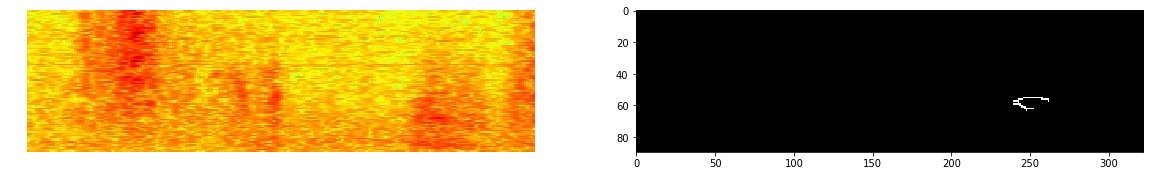

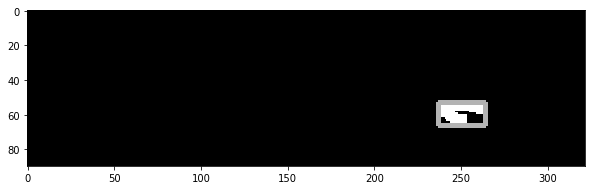

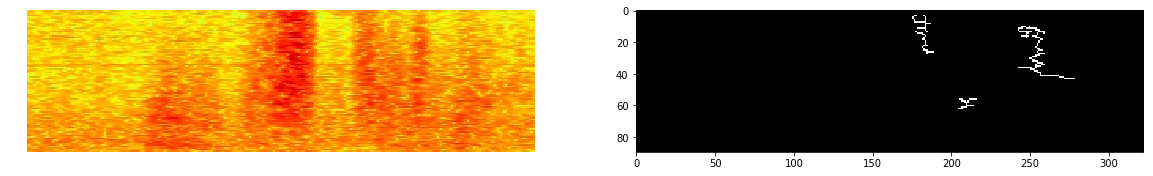

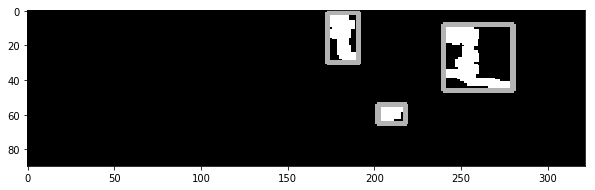

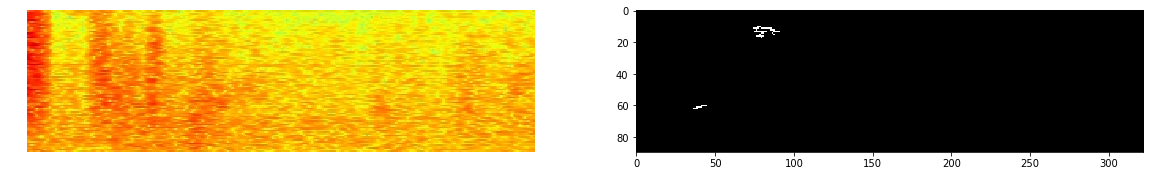

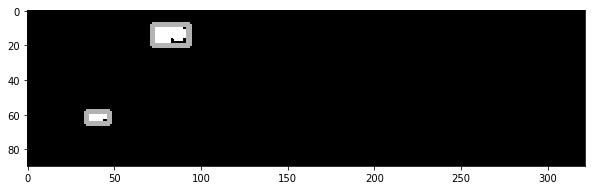

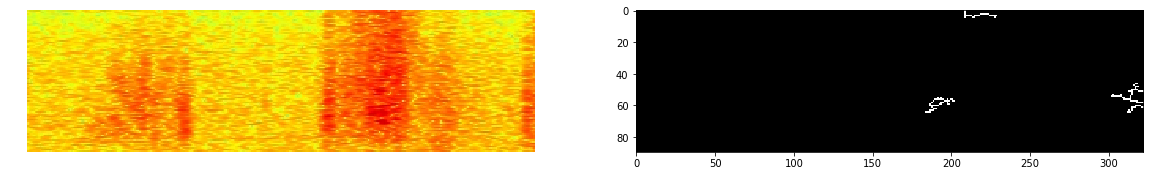

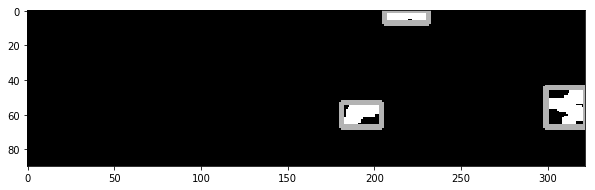

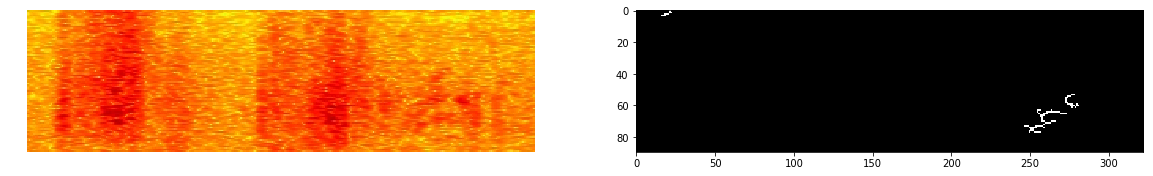

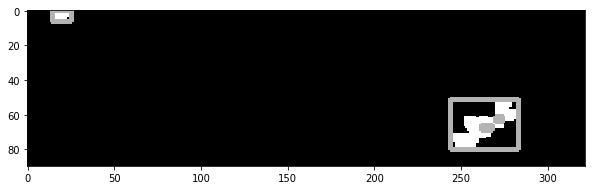

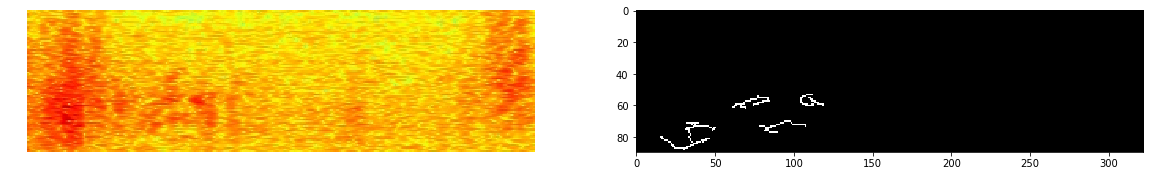

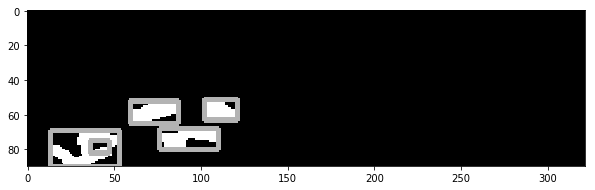

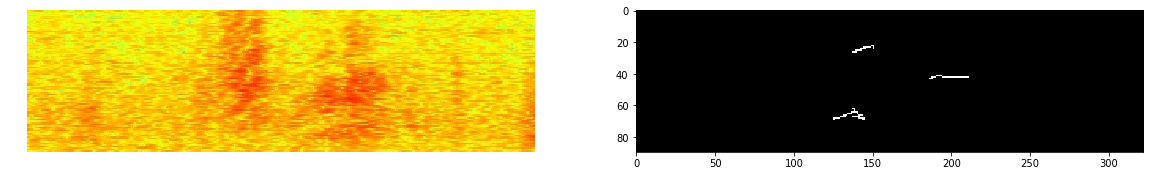

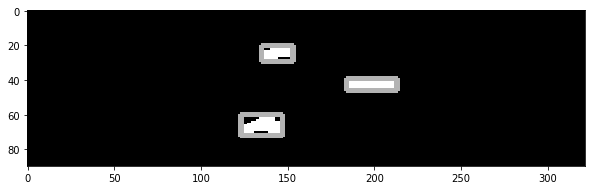

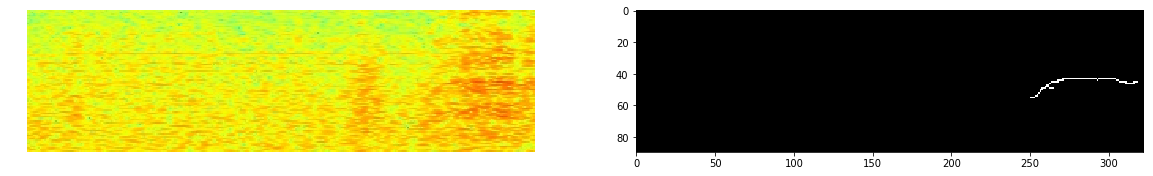

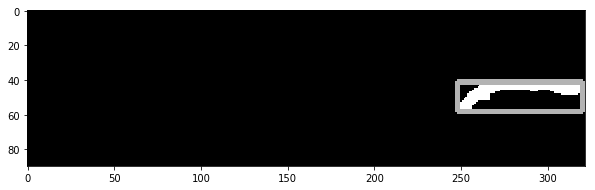

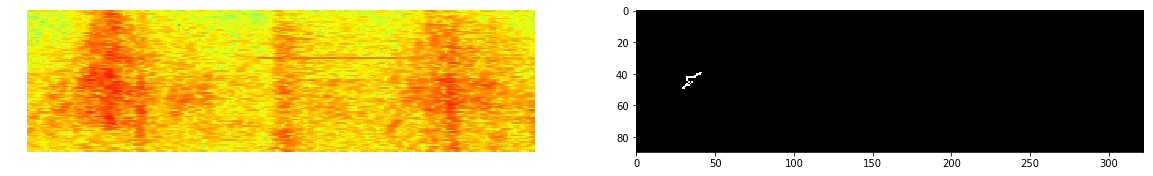

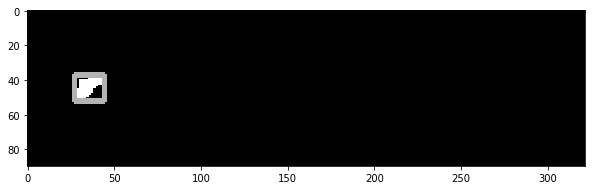

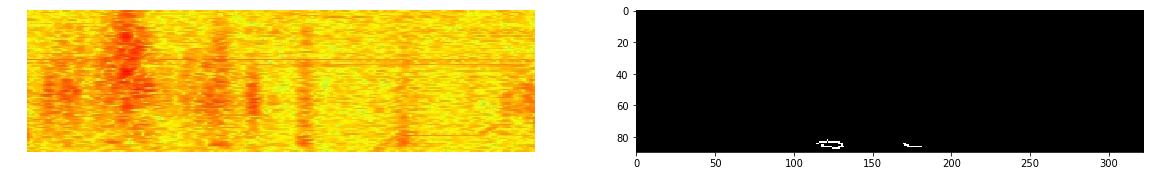

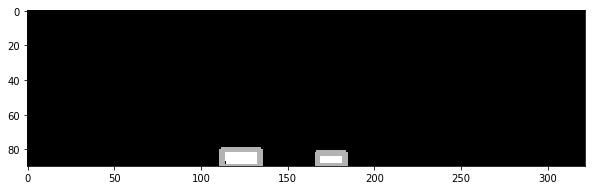

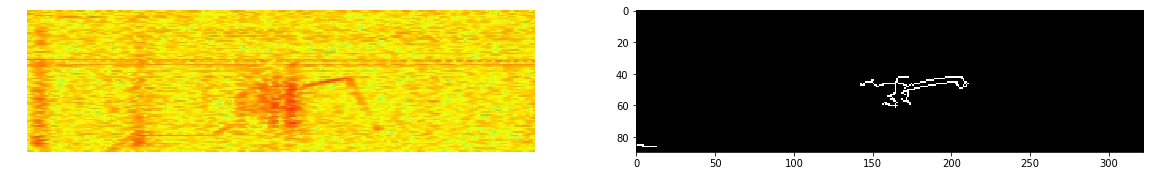

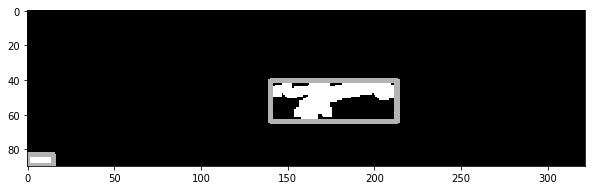

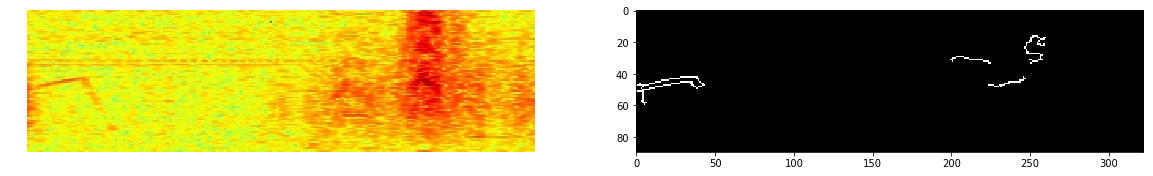

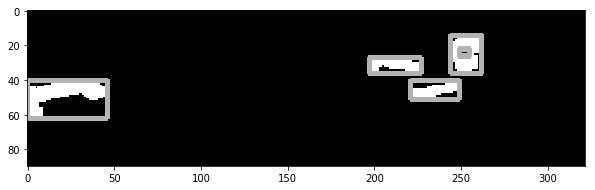

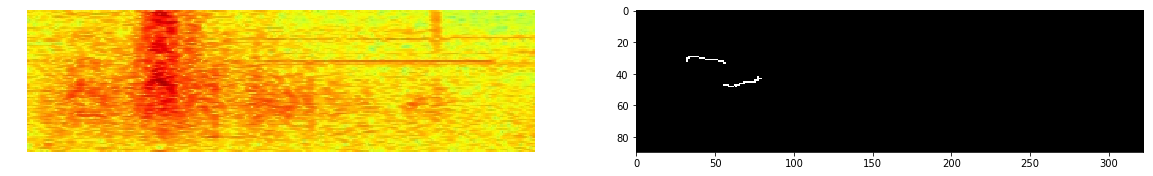

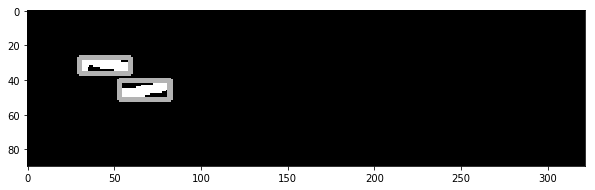

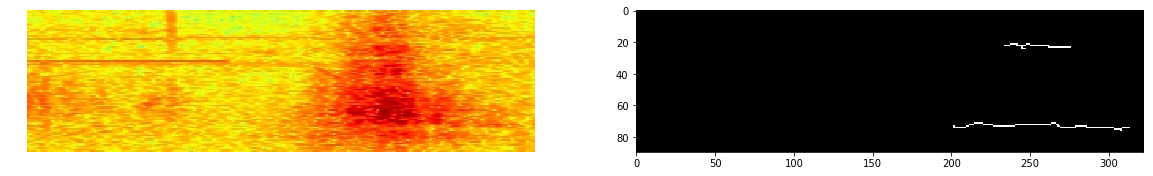

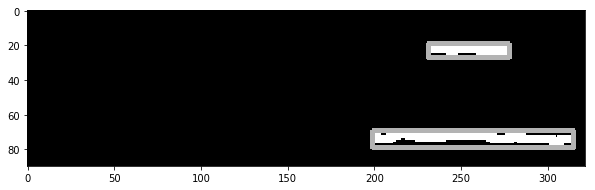

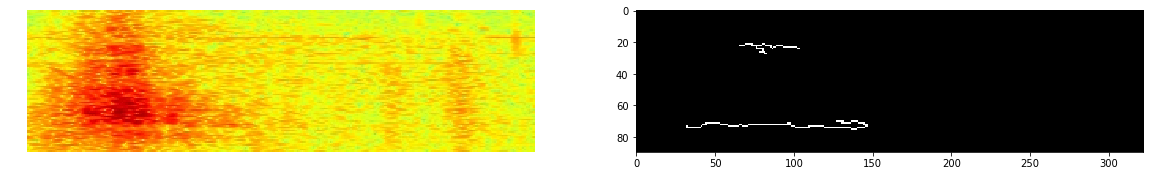

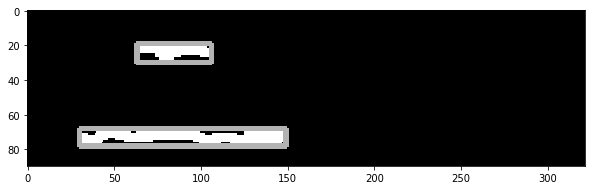

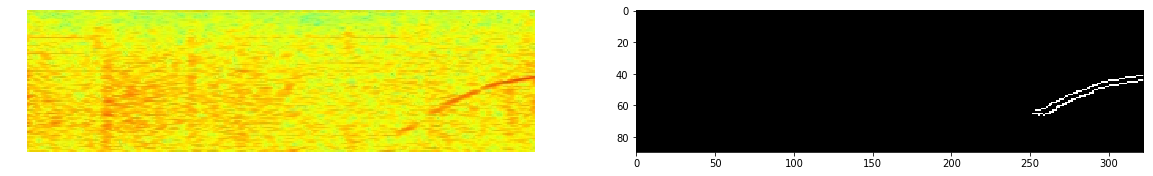

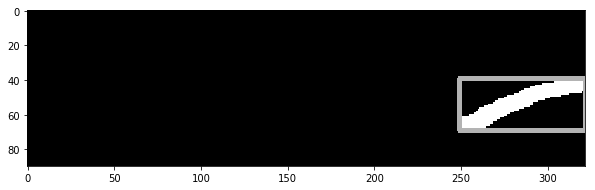

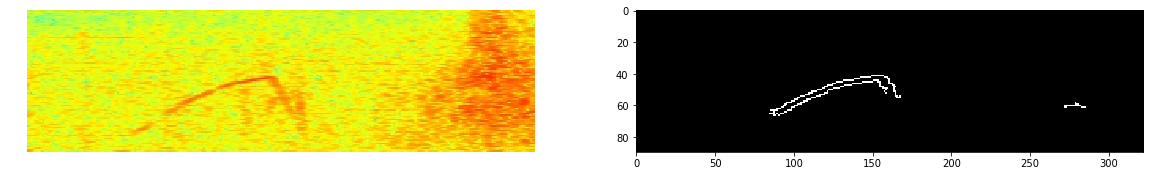

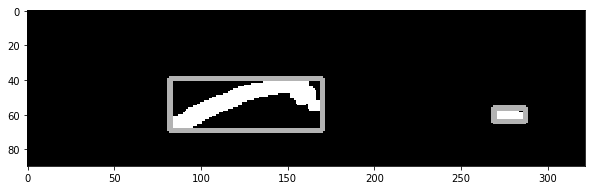

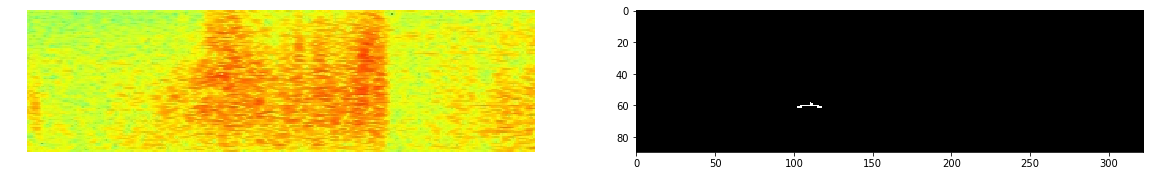

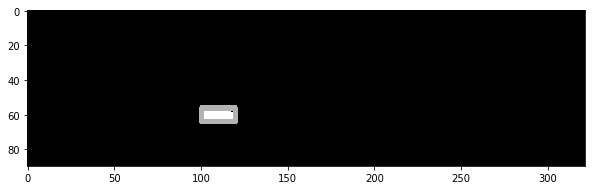

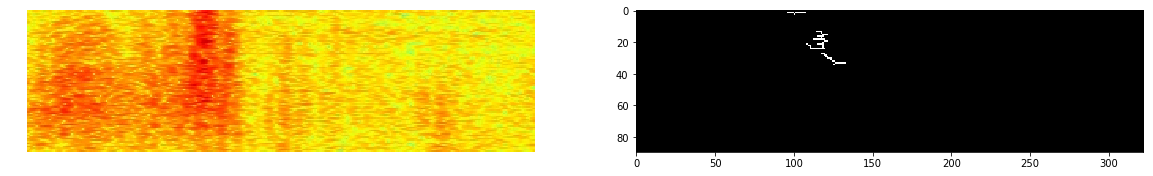

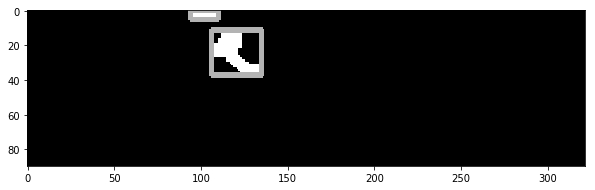

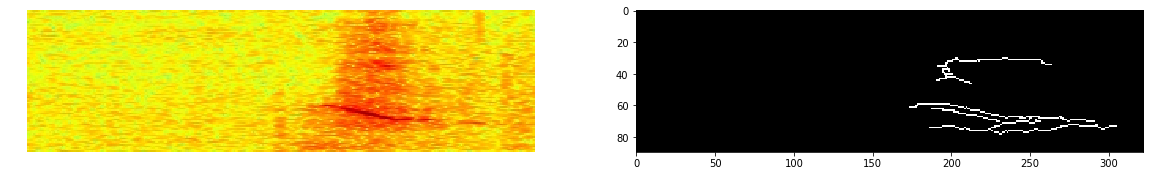

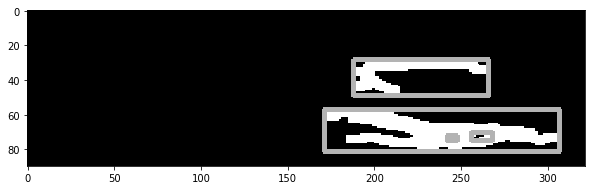

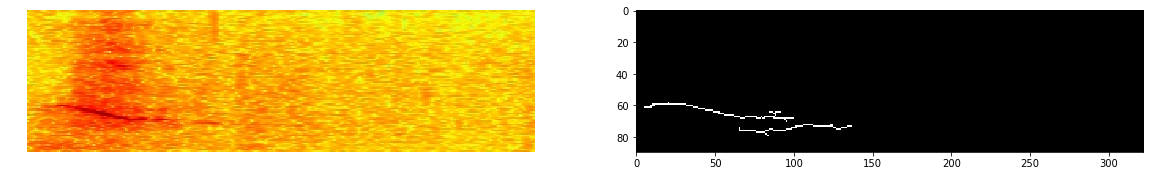

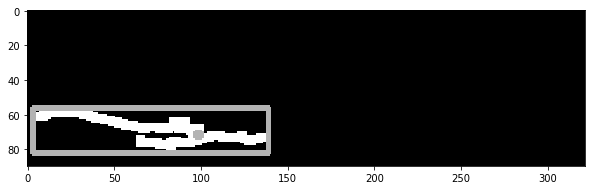

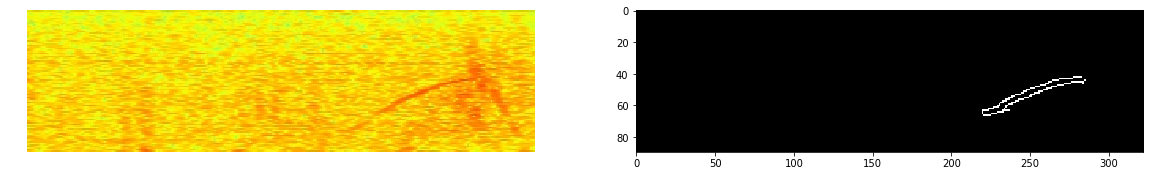

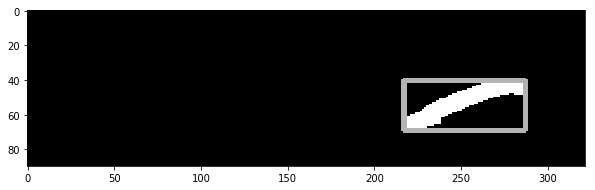

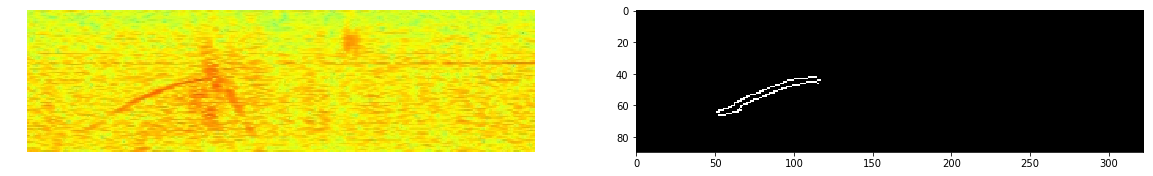

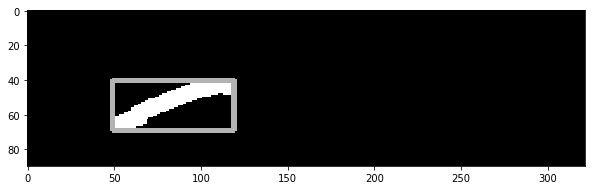

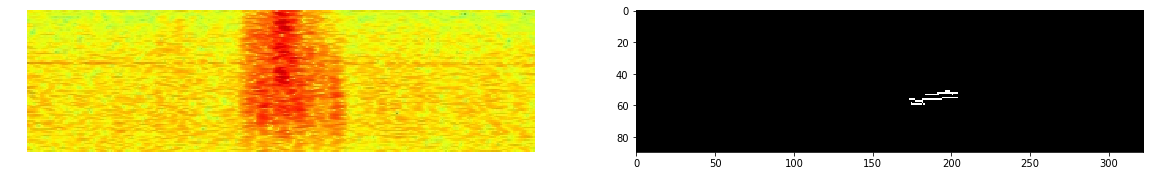

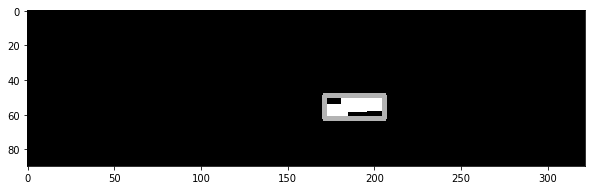

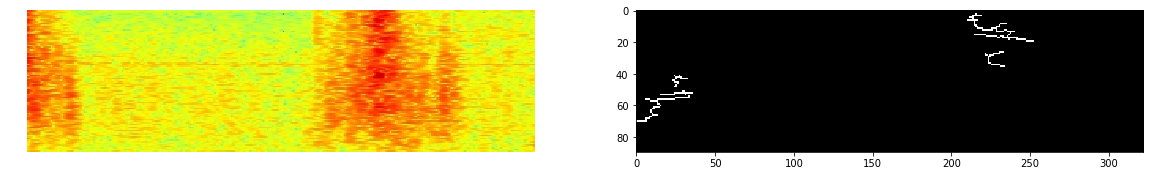

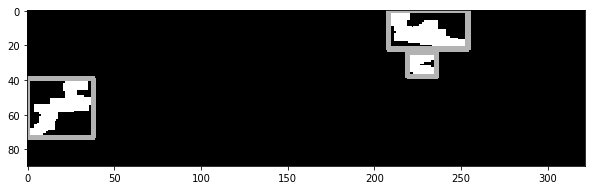

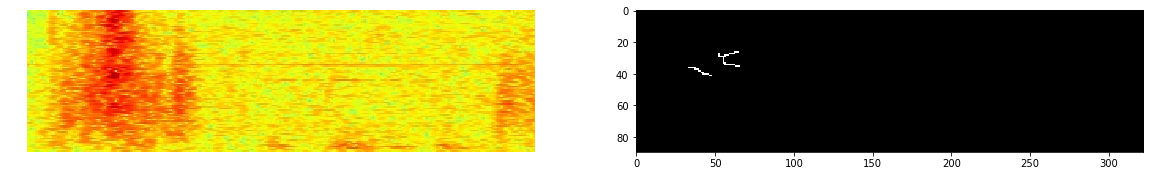

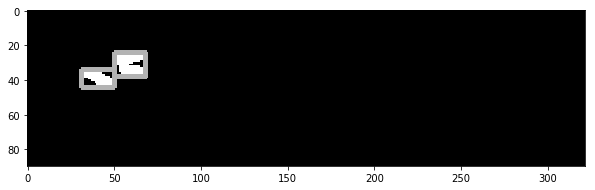

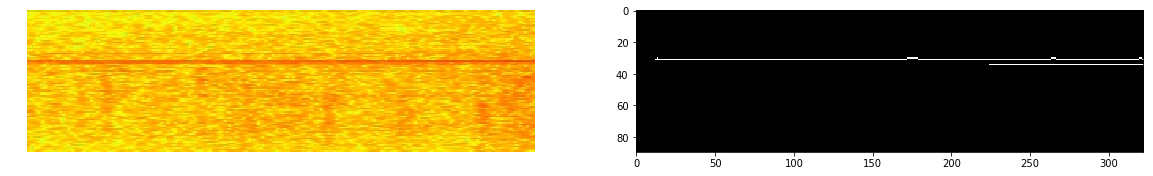

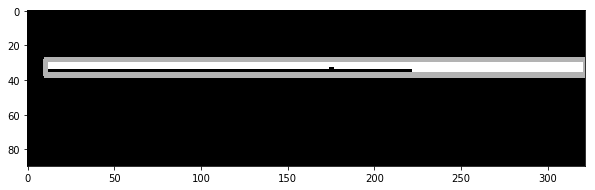

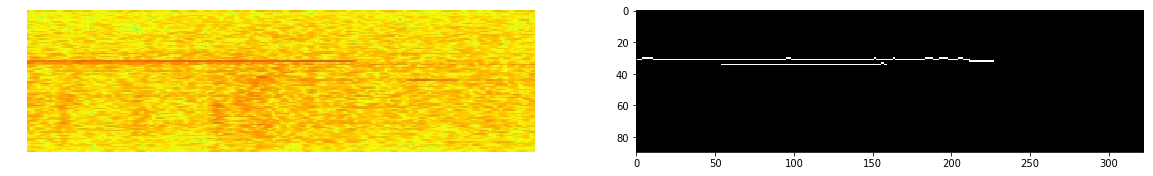

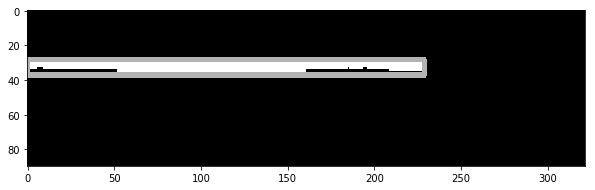

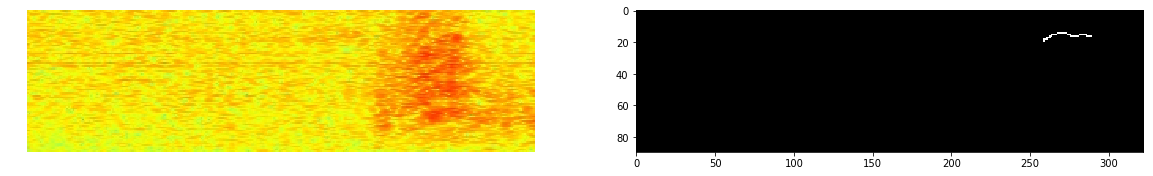

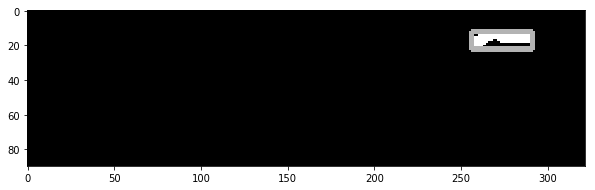

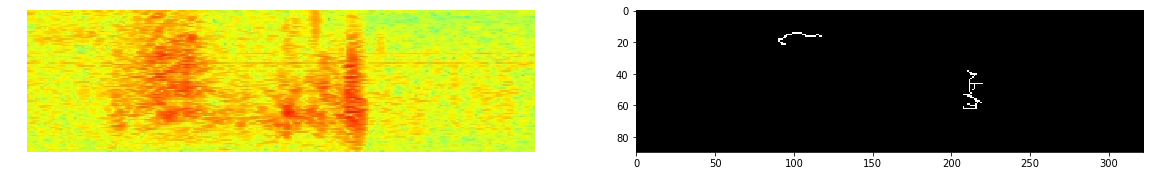

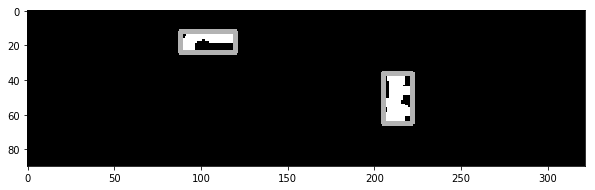

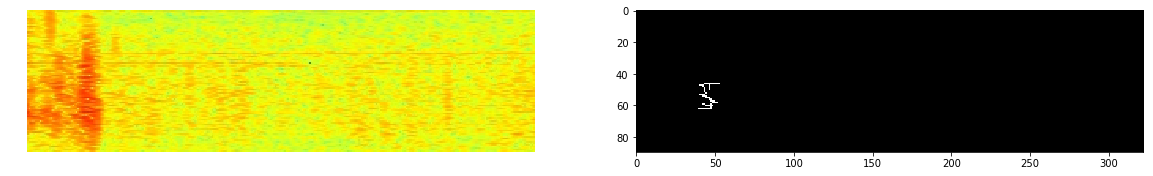

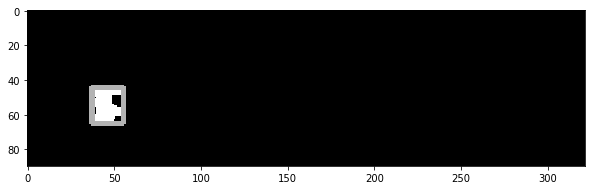

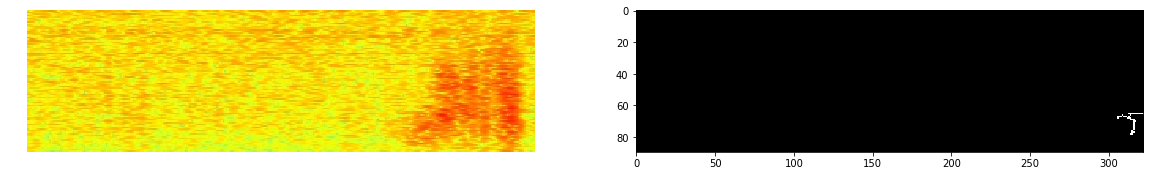

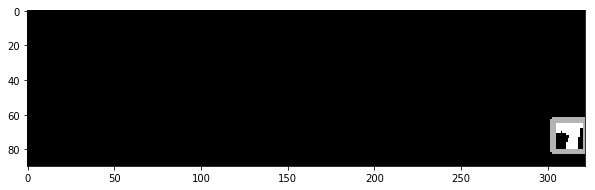

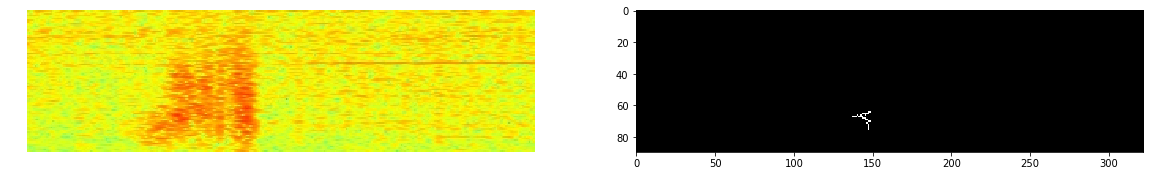

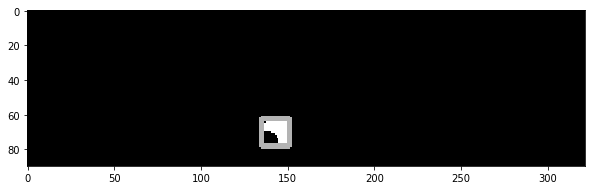

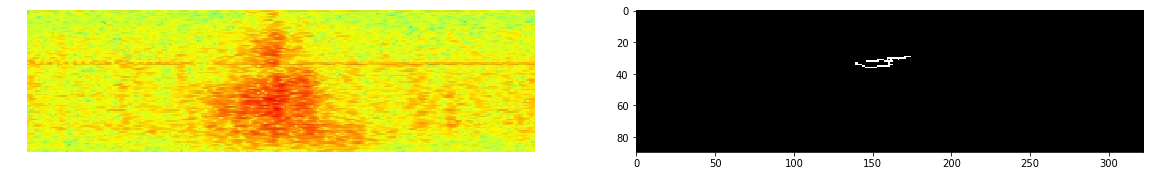

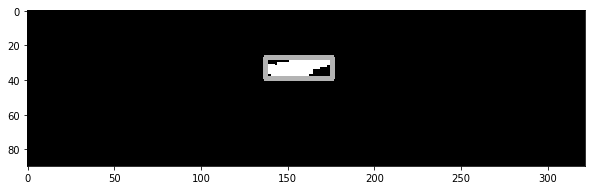

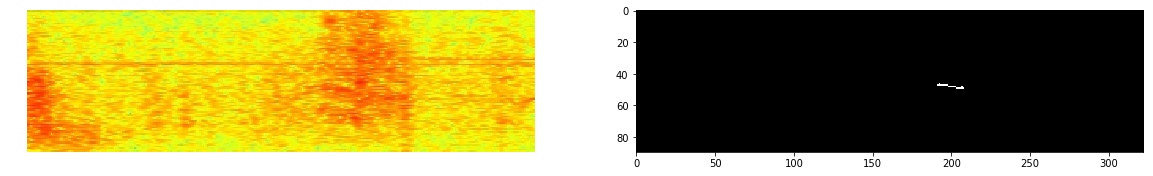

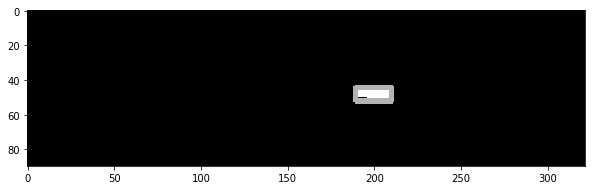

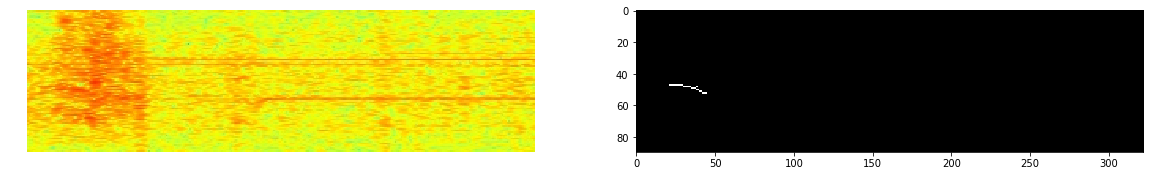

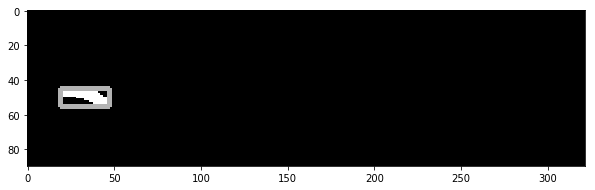

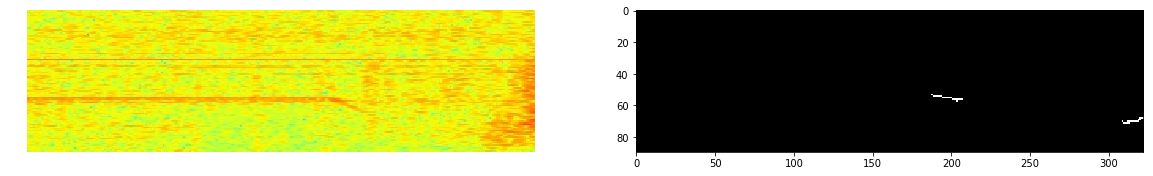

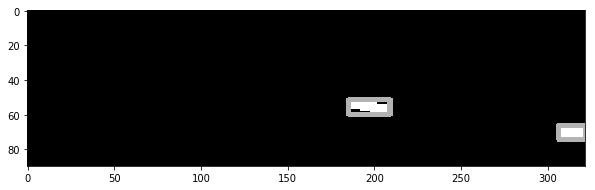

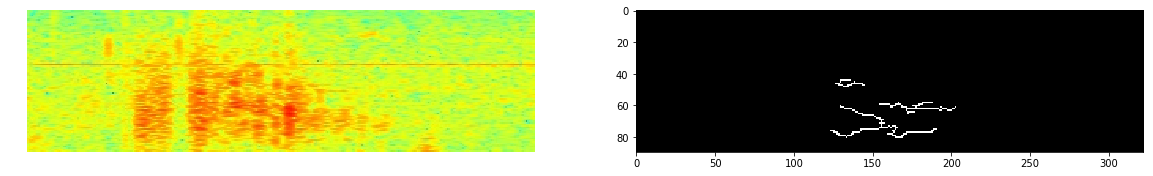

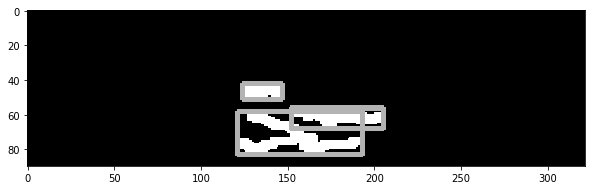

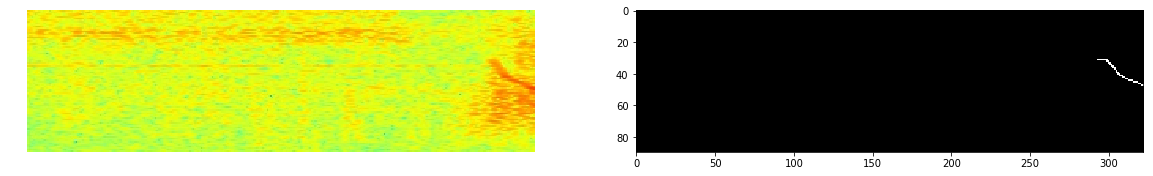

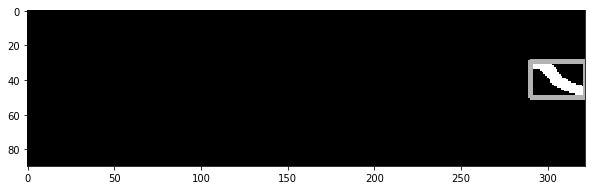

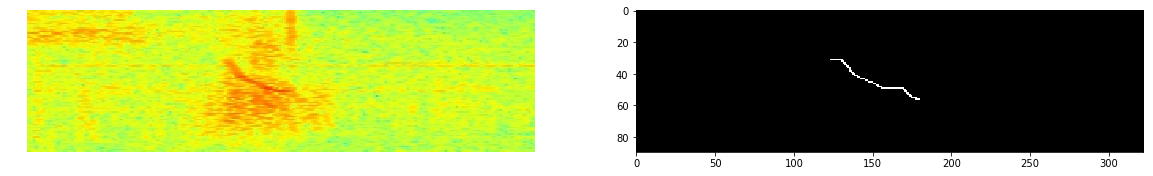

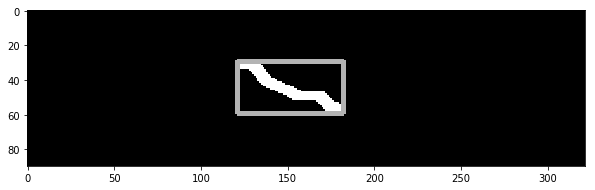

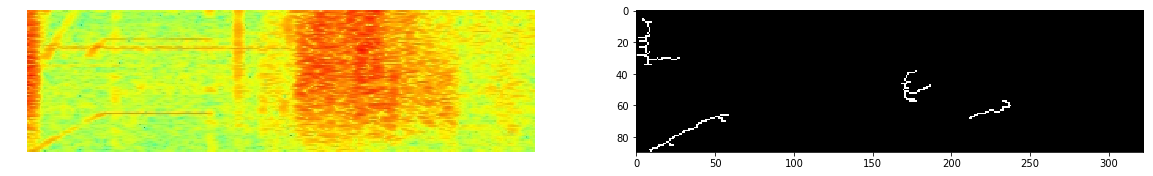

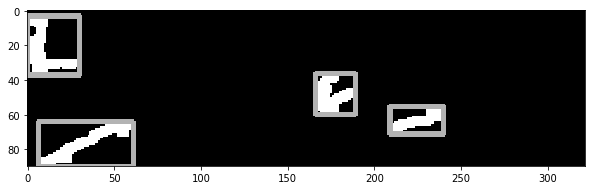

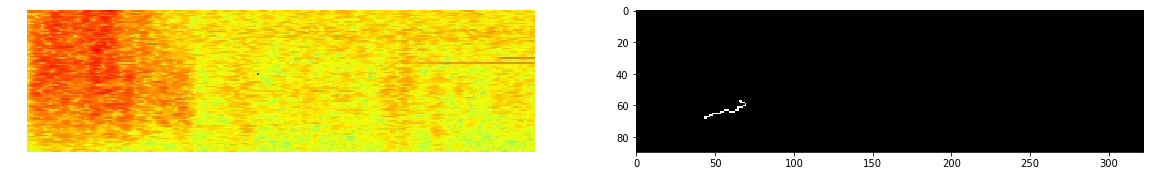

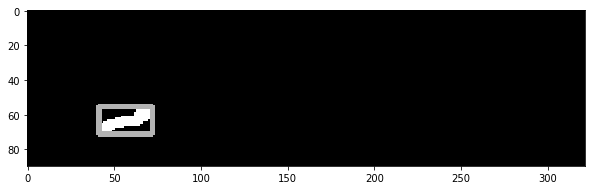

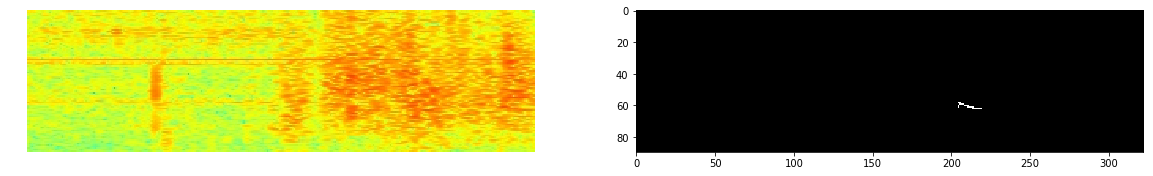

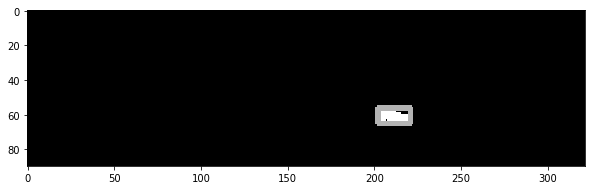

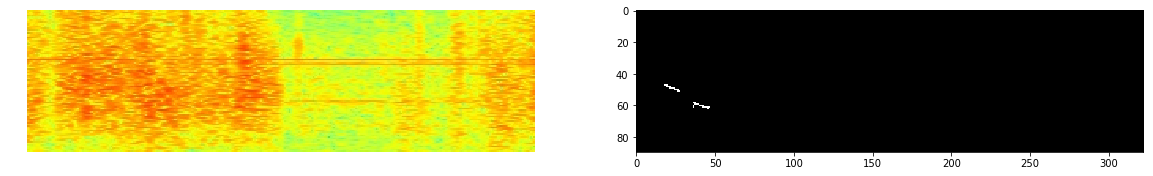

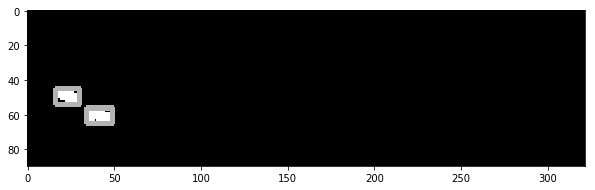

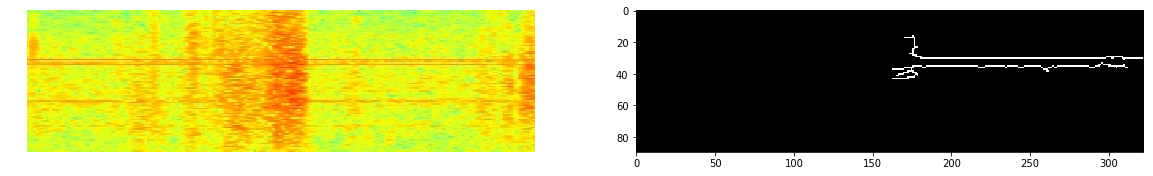

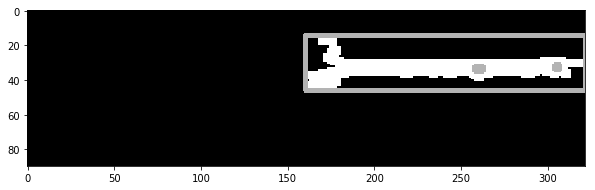

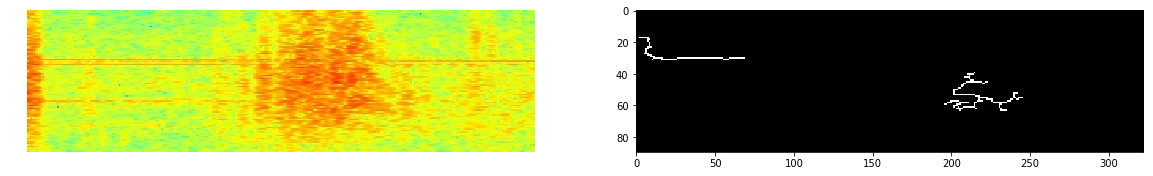

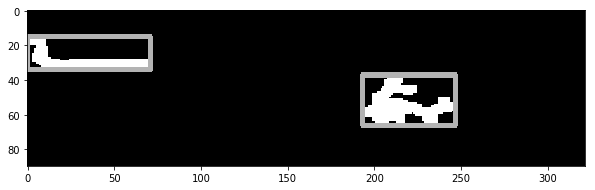

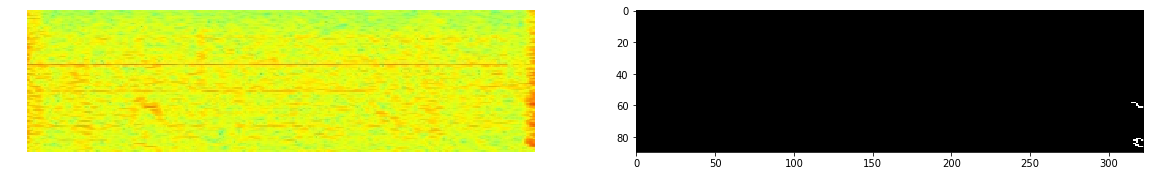

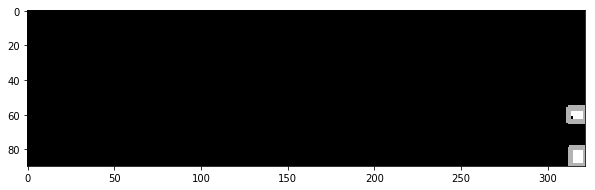

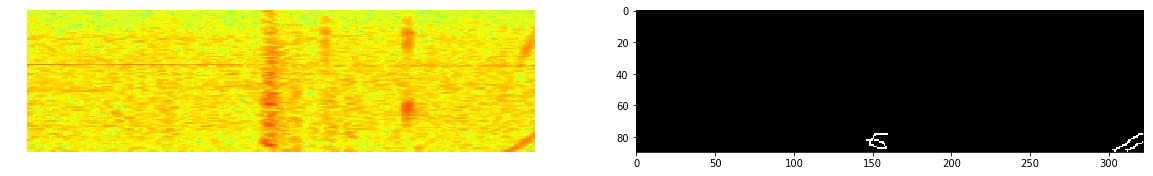

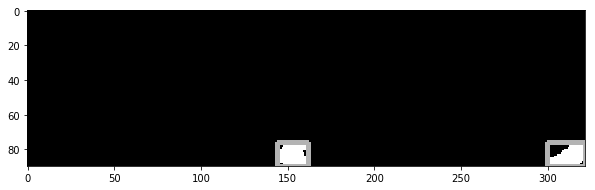

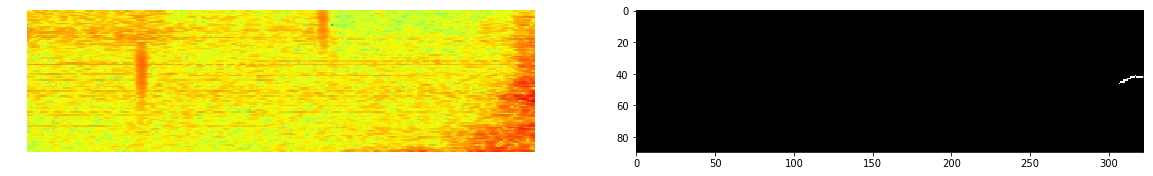

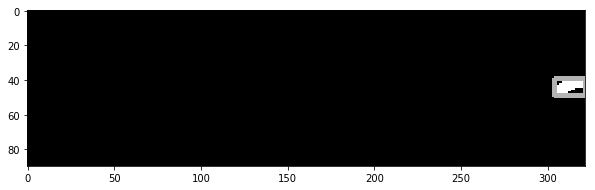

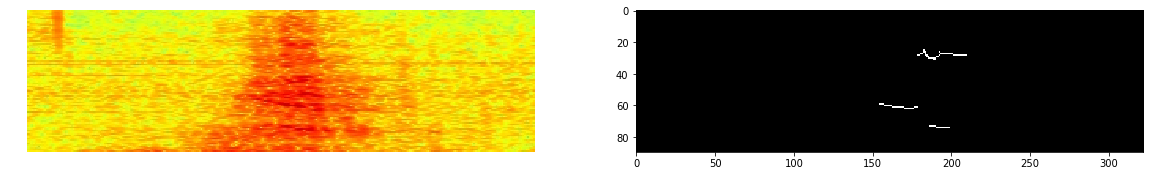

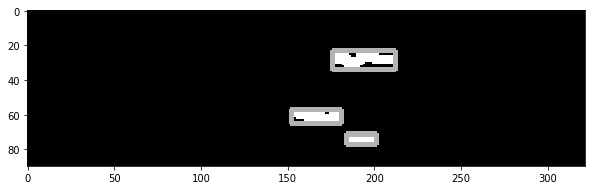

In [8]:
for i in range(0,50):
    #show normal version
    file = day3[i]
    filename = "data/ABC/spectrograms/2019003/" + file
    im = cv2.imread(filename)
    print(im.shape)
    RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
    ax1.axis('off')
    RGB_img = RGB_img[140:230, 60:-50, :] 
    ax1.imshow(RGB_img)
    #fixes openCV BGR Initialization
    res = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    print(res.shape)
    res = res[140:230, 60:-50, :]    
    #stops matplotlib from converting image to multiple conlors
    plt.rc('image', cmap='gray')
    res = cv2.blur(res,(6,3))
    #Creates canny edges
    display = cv2.Canny(res, 90, 300)
    ax2.imshow(display)
    mask = cv2.inRange(display, 100, 255)
    kernel = np.ones((5, 5), np.uint8)
    # Erode / dilate to make label appear "boxy"
    boxy = cv2.erode(mask, kernel, iterations=0)
    boxy = cv2.dilate(boxy, kernel, iterations=1)
    contours, _ = cv2.findContours(boxy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        cv2.drawContours(im, contour, -1, (0, 255, 0), 3)
        boundRect = cv2.boundingRect(contour)
        color = (180, 180, 180)
        cv2.rectangle(boxy, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
        cv2.rectangle(RGB_img, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
    
        width = boundRect[2]
        height= boundRect[3]
    plt.rcParams["figure.figsize"] = (10,5)
    plt.figure()
    plt.imshow(boxy)

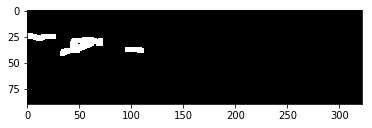

In [9]:
mask = cv2.inRange(display, 100, 255)
kernel = np.ones((5, 5), np.uint8)
# Erode / dilate to make label appear "boxy"
boxy = cv2.erode(mask, kernel, iterations=0)
boxy = cv2.dilate(boxy, kernel, iterations=1)
plt.figure()
plt.imshow(boxy)

In [11]:
contours, _ = cv2.findContours(boxy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

4


17 6
29 8
36 11


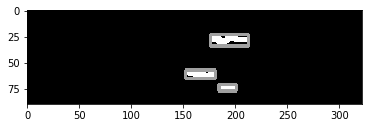

In [35]:
for contour in contours:
    cv2.drawContours(im, contour, -1, (0, 255, 0), 3)
    boundRect = cv2.boundingRect(contour)
    color = (160, 160, 0)
    cv2.rectangle(boxy, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
    cv2.rectangle(RGB_img, (int(boundRect[0]), int(boundRect[1])), 
        (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
    
    width = boundRect[2]
    height= boundRect[3]
    print(width, height)
    
plt.figure()
plt.imshow(boxy)


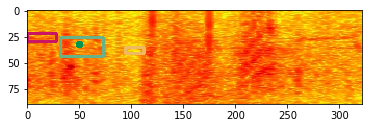

In [13]:
plt.imshow(RGB_img)